In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def integral_trapezoide(funcion,intervalo,paso): # intervalo : linspace
    suma = 0
    for i in range(len(intervalo)-1):
        suma += funcion(intervalo[i])*paso #sumo cuadrado
        suma += (funcion(intervalo[i+1]) - funcion(intervalo[i]))*paso / 2 #sumo triangulo
    return suma


In [13]:
cuadrado = lambda x: x**2
cantidadDePuntos = 10
fin = 1
intervalo = np.linspace(0,fin,cantidadDePuntos,dtype=np.float128)
paso = np.float128(fin/cantidadDePuntos) 
integral_trapezoide(cuadrado,intervalo,paso)

0.3018518518518518382

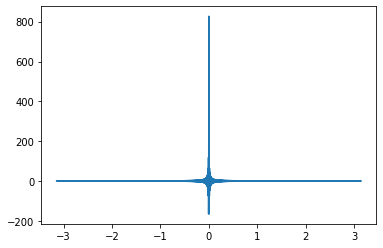

In [14]:
N = 1000
D = lambda x : np.sin((N+1/2)*x)/(2*np.sin(x/2))
intervalo = np.linspace(-np.pi,np.pi,3000,dtype=np.float128)
plt.plot(intervalo,D(intervalo))

In [15]:
integral_trapezoide(D,intervalo,2*np.pi/3000)/np.pi

0.99966666666663356094

In [97]:
def fourier_re_piola(funcion,n,N,inicio,fin):
    intervalo = np.linspace(inicio,fin,N)
    an = ([integral_trapezoide(lambda x: funcion(x)*np.cos(i*x),intervalo,2*np.pi/N)*(1/np.pi) for i in range(n)])
    bn = ([integral_trapezoide(lambda x: funcion(x)*np.sin(i*x),intervalo,2*np.pi/N)*(1/np.pi) for i in range(n)])
    return an,bn

def desFourier_re_piola(an,bn,n,N,inicio,fin):
    intervalo = np.linspace(inicio,fin,N)
    res = []
    for j in range(N):
        res.append(an[0]/2 + np.sum([an[i]*np.cos(i*intervalo[j]) for i in range(1,n)]) + np.sum([bn[i]*np.sin(i*intervalo[j]) for i in range(1,n)])) 
    
    return  res

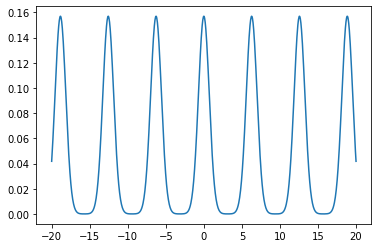

In [101]:
cuadrado = lambda x: np.e**-(x**2)

an,bn=fourier_re_piola(cuadrado,50,1000,-20,20)
dots = desFourier_re_piola(an,bn,50,1000,-20,20)
intervalo = np.linspace(-20,20,1000)
plt.plot(intervalo,dots)
